In [76]:
%matplotlib inline

import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds.drop('Unnamed: 0', axis=1, inplace = True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_index,color_index
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0


In [41]:
# Cut is ordinal, define order for sorting data
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
diamonds.cut = pd.Categorical(diamonds.cut, categories = cut_categories)


In [36]:
# FIGURE PREPARATION
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

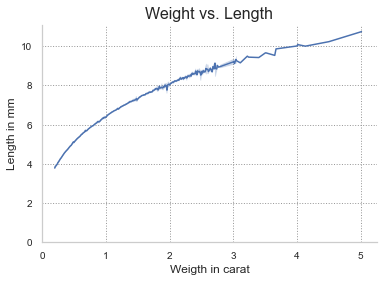

In [99]:
# LINEAR PLOT
sns.lineplot(x = 'carat', y = 'x', data = diamonds)
sns.despine()
plt.xlim(left = 0)
plt.xlabel('Weigth in carat', fontsize = 12)
plt.xticks(fontsize = 10)
plt.ylim(bottom = 0)
plt.ylabel('Length in mm', fontsize = 12)
plt.yticks(fontsize = 10)
plt.title('Weight vs. Length', fontsize = 16)
plt.show()


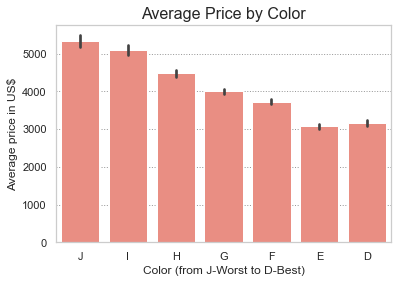

In [34]:
# BAR PLOT
sns.barplot(x = 'color', y = 'price', data = diamonds.sort_values(by='color', ascending = False), color = 'salmon')
plt.xlabel('Color (from J-Worst to D-Best)', fontsize = 12)
plt.ylabel('Average price in US$', fontsize = 12)
plt.title('Average Price by Color', fontsize = 16)
plt.show()

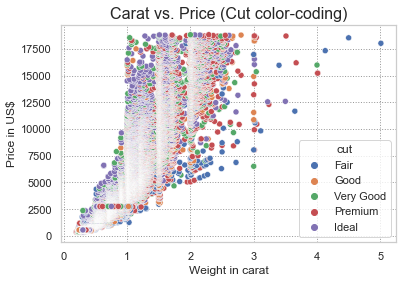

In [84]:
# SCATTER PLOT
sns.scatterplot(x = 'carat', y = 'price', data = diamonds, hue = 'cut')
plt.xlabel('Weight in carat', fontsize = 12)
plt.ylabel('Price in US$', fontsize = 12)
plt.title('Carat vs. Price (Cut color-coding)', fontsize = 16)
plt.show()

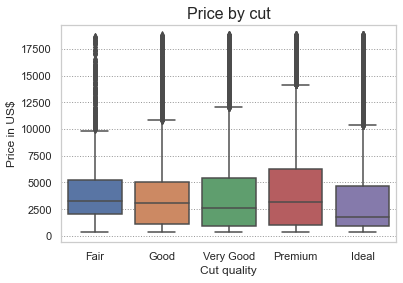

In [48]:
# BOXPLOT
sns.boxplot(x = 'cut', y = 'price', data = diamonds)
plt.xlabel('Cut quality', fontsize = 12)
plt.ylabel('Price in US$', fontsize = 12)
plt.title('Price by cut', fontsize = 16)
plt.show()

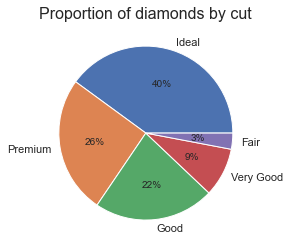

In [87]:
# PIE CHART - DOES NOT EXIST IN SEABORN
plt.pie(diamonds.value_counts('cut'), autopct = '%0.0f%%', labels = diamonds.cut.unique())
plt.title('Proportion of diamonds by cut', fontsize = 16)
plt.show()

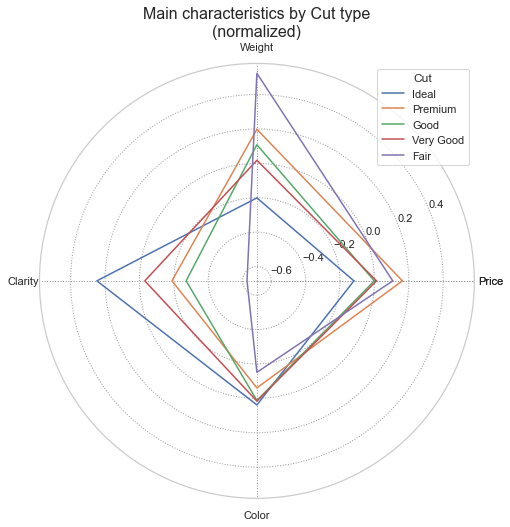

In [91]:
# RADAR - DOES NOT EXIST NATIVELY IN SEABORN

# Normalization of data
normalized_diamonds = pd.DataFrame()
for col in diamonds.columns:
    if is_numeric_dtype(diamonds[col]):
        normalized_diamonds[col]=(diamonds[col]-diamonds[col].mean())/diamonds[col].std()
    else:
        normalized_diamonds[col]=diamonds[col]

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

categories = ['Price', 'Weight', 'Clarity', 'Color']
categories = [*categories, categories[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))

d = {}
for cut in diamonds.cut.unique():
    d[cut] = normalized_diamonds.loc[normalized_diamonds.cut == cut, ['price', 'carat', 'clarity_index', 'color_index', 'price']].mean().to_list()
    plt.plot(label_loc, d[cut], label = cut)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.title('Main characteristics by Cut type\n(normalized)', fontsize = 16)
plt.legend(title = 'Cut')
plt.show()

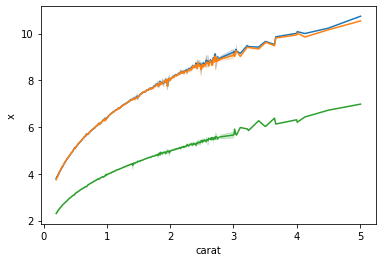

In [10]:
# MULTIPLE SERIES
sns.lineplot(x = 'carat', y = 'x', data = diamonds)
sns.lineplot(x = 'carat', y = 'y', data = diamonds)
sns.lineplot(x = 'carat', y = 'z', data = diamonds)
plt.xlabel('Weigth in carat', fontsize = 12)
plt.ylabel('Length in mm', fontsize = 12)
plt.title('Weight vs. Length', fontsize = 16)
plt.show()

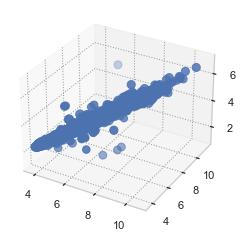

In [93]:
# 3D PROJECTION
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(diamonds.x, diamonds.y, diamonds.z, s = diamonds.depth)

plt.show()